<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(_3_6)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-3.6'

In [4]:
os.listdir(base_path)

['data_add_delta_-3.6_n20.csv',
 'data_add_delta_-3.6_n30.csv',
 'data_add_delta_-3.6_n60.csv',
 'data_add_delta_-3.6_n120.csv',
 'data_add_delta_-3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.6_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.294675,76.953260,37.569534,-0.000313,165.817156,165.818249,-0.001094
1,0.0,1.0,49.328509,67.870394,42.525890,-0.000187,169.724606,169.725142,-0.000536
2,0.0,2.0,96.066060,30.376482,58.029557,-0.000695,194.471403,194.470337,0.001067
3,0.0,3.0,39.872195,51.822152,49.310528,0.000463,151.005338,151.005090,0.000248
4,0.0,4.0,81.862816,25.419194,52.450683,0.000155,169.732848,169.731221,0.001627
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,75.389686,64.936955,71.085403,-0.000491,221.411553,221.411843,-0.000290
19996,999.0,16.0,49.150374,44.255402,96.730766,0.000756,200.137299,200.136143,0.001155
19997,999.0,17.0,37.729873,52.887421,72.956196,0.000760,173.574250,173.573441,0.000809
19998,999.0,18.0,58.654523,97.549723,78.654038,-0.000215,244.858069,244.858857,-0.000788


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.294675,76.953260,37.569534,-0.000313,165.817156,165.818249,-0.001094
1,0.0,1.0,49.328509,67.870394,42.525890,-0.000187,169.724606,169.725142,-0.000536
2,0.0,2.0,96.066060,30.376482,58.029557,-0.000695,194.471403,194.470337,0.001067
3,0.0,3.0,39.872195,51.822152,49.310528,0.000463,151.005338,151.005090,0.000248
4,0.0,4.0,81.862816,25.419194,52.450683,0.000155,169.732848,169.731221,0.001627
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,75.389686,64.936955,71.085403,-0.000491,221.411553,221.411843,-0.000290
19996,999.0,16.0,49.150374,44.255402,96.730766,0.000756,200.137299,200.136143,0.001155
19997,999.0,17.0,37.729873,52.887421,72.956196,0.000760,173.574250,173.573441,0.000809
19998,999.0,18.0,58.654523,97.549723,78.654038,-0.000215,244.858069,244.858857,-0.000788


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    41.294675  76.953260  37.569534 -0.000313  165.817156   
      1.0    49.328509  67.870394  42.525890 -0.000187  169.724606   
      2.0    96.066060  30.376482  58.029557 -0.000695  194.471403   
      3.0    39.872195  51.822152  49.310528  0.000463  151.005338   
      4.0    81.862816  25.419194  52.450683  0.000155  169.732848   
...                ...        ...        ...       ...         ...   
999.0 15.0   75.389686  64.936955  71.085403 -0.000491  221.411553   
      16.0   49.150374  44.255402  96.730766  0.000756  200.137299   
      17.0   37.729873  52.887421  72.956196  0.000760  173.574250   
      18.0   58.654523  97.549723  78.654038 -0.000215  244.858069   
      19.0   47.307507  25.817320  56.804765  0.000913  139.930505   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    165.818249 -0.001094  
      1.0    169.725142 -0.000536  
      2.0    194.470337  0.001067  
      3.0    151.005090  0.000248  
      4.0    169.731221  0.001627  
...                 ...       ...  
999.0 15.0   221.411843 -0.000290  
      16.0   200.136143  0.001155  
      17.0   173.573441  0.000809  
      18.0   244.858857 -0.000788  
      19.0   139.928972  0.001533  

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    41.294675  76.953260  37.569534 -0.000313  165.817156   
      1.0    49.328509  67.870394  42.525890 -0.000187  169.724606   
      2.0    96.066060  30.376482  58.029557 -0.000695  194.471403   
      3.0    39.872195  51.822152  49.310528  0.000463  151.005338   
      4.0    81.862816  25.419194  52.450683  0.000155  169.732848   
...                ...        ...        ...       ...         ...   
999.0 15.0   75.389686  64.936955  71.085403 -0.000491  221.411553   
      16.0   49.150374  44.255402  96.730766  0.000756  200.137299   
      17.0   37.729873  52.887421  72.956196  0.000760  173.574250   
      18.0   58.654523  97.549723  78.654038 -0.000215  244.858069   
      19.0   47.307507  25.817320  56.804765  0.000913  139.930505   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    165.818249 -0.001094  
      1.0    169.725142 -0.000536  
      2.0    194.470337  0.001067  
      3.0    151.005090  0.000248  
      4.0    169.731221  0.001627  
...                 ...       ...  
999.0 15.0   221.411843 -0.000290  
      16.0   200.136143  0.001155  
      17.0   173.573441  0.000809  
      18.0   244.858857 -0.000788  
      19.0   139.928972  0.001533  

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.294675,76.953260,37.569534,-0.000313,165.817156,165.818249,-0.001094
1,0.0,1.0,49.328509,67.870394,42.525890,-0.000187,169.724606,169.725142,-0.000536
2,0.0,2.0,96.066060,30.376482,58.029557,-0.000695,194.471403,194.470337,0.001067
3,0.0,3.0,39.872195,51.822152,49.310528,0.000463,151.005338,151.005090,0.000248
4,0.0,4.0,81.862816,25.419194,52.450683,0.000155,169.732848,169.731221,0.001627
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,75.389686,64.936955,71.085403,-0.000491,221.411553,221.411843,-0.000290
19996,999.0,16.0,49.150374,44.255402,96.730766,0.000756,200.137299,200.136143,0.001155
19997,999.0,17.0,37.729873,52.887421,72.956196,0.000760,173.574250,173.573441,0.000809
19998,999.0,18.0,58.654523,97.549723,78.654038,-0.000215,244.858069,244.858857,-0.000788


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    41.294675  76.953260  37.569534 -0.000313  165.817156   
      1.0    49.328509  67.870394  42.525890 -0.000187  169.724606   
      2.0    96.066060  30.376482  58.029557 -0.000695  194.471403   
      3.0    39.872195  51.822152  49.310528  0.000463  151.005338   
      4.0    81.862816  25.419194  52.450683  0.000155  169.732848   
...                ...        ...        ...       ...         ...   
999.0 15.0   75.389686  64.936955  71.085403 -0.000491  221.411553   
      16.0   49.150374  44.255402  96.730766  0.000756  200.137299   
      17.0   37.729873  52.887421  72.956196  0.000760  173.574250   
      18.0   58.654523  97.549723  78.654038 -0.000215  244.858069   
      19.0   47.307507  25.817320  56.804765  0.000913  139.930505   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    165.818249 -0.001094  
      1.0    169.725142 -0.000536  
      2.0    194.470337  0.001067  
      3.0    151.005090  0.000248  
      4.0    169.731221  0.001627  
...                 ...       ...  
999.0 15.0   221.411843 -0.000290  
      16.0   200.136143  0.001155  
      17.0   173.573441  0.000809  
      18.0   244.858857 -0.000788  
      19.0   139.928972  0.001533  

[20000 rows x 7 columns]

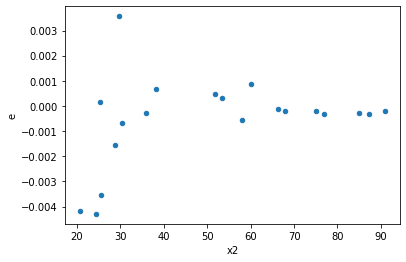

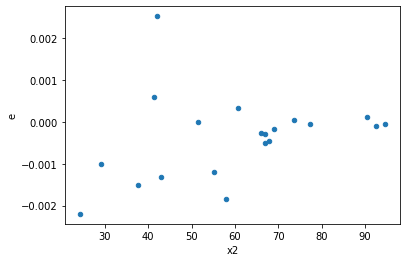

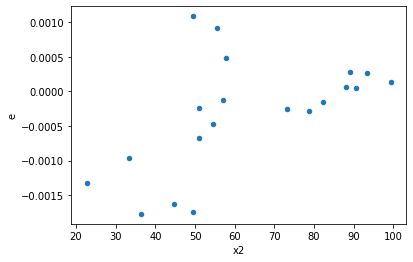

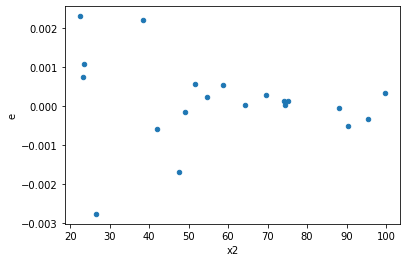

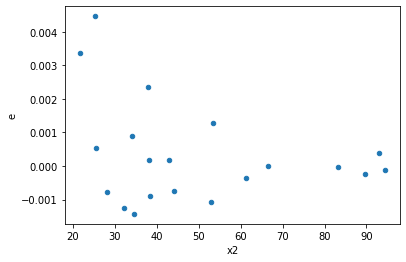

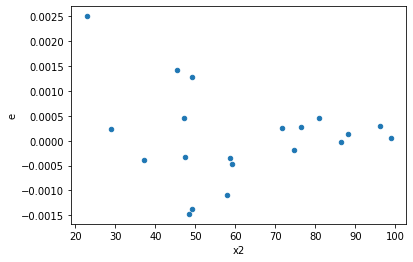

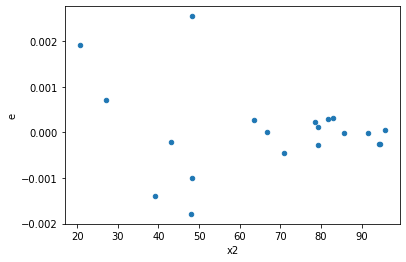

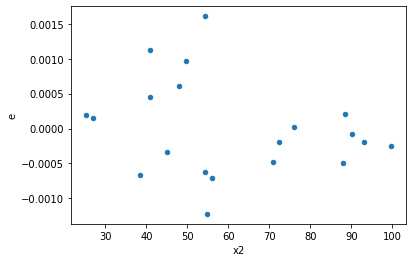

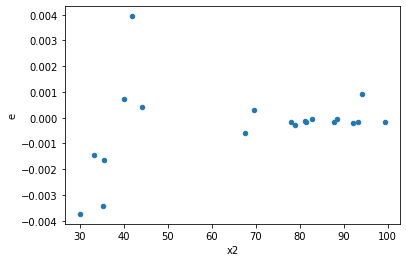

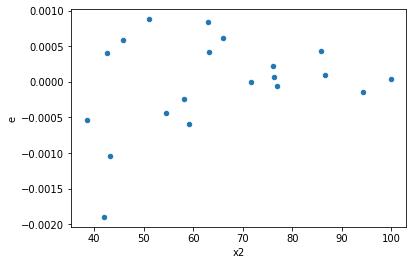

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
7.0,5.0,5.0,1.62623222245161e-06,1.662015643473959e-06,3.25246444490322e-07,3.324031286947918e-07,1.0220038814434533,0.9815268715016932,0.5092365642491534,0.4907634357508466,Reject001=1 : Homoscedasticity
22.0,5.0,5.0,3.35147132259938e-06,5.4845004708021215e-06,6.70294264519876e-07,1.0969000941604244e-06,1.636445591468877,0.6020177566838976,0.6989911216580512,0.3010088783419488,Reject001=1 : Homoscedasticity
28.0,5.0,5.0,1.5839404698150769e-06,2.548993421892117e-06,3.1678809396301535e-07,5.097986843784234e-07,1.609273498889582,0.6143106223842301,0.692844688807885,0.30715531119211503,Reject001=1 : Homoscedasticity
32.0,5.0,5.0,7.534455290886126e-06,9.049074727261093e-06,1.5068910581772252e-06,1.8098149454522185e-06,1.2010257381455418,0.8455945878807296,0.5772027060596352,0.4227972939403648,Reject001=1 : Homoscedasticity
42.0,5.0,5.0,1.6678832250510975e-06,2.0903495422995503e-06,3.335766450102195e-07,4.1806990845991006e-07,1.2532949015273596,0.8103687585501516,0.5948156207249242,0.4051843792750758,Reject001=1 : Homoscedasticity
44.0,5.0,5.0,1.3327409981896298e-07,5.391160756162144e-07,2.6654819963792596e-08,1.0782321512324288e-07,4.045167638337378,0.1512802867875933,0.9243598566062033,0.07564014339379665,Reject001=1 : Homoscedasticity
56.0,5.0,5.0,6.000009257910454e-06,6.683142740045223e-05,1.2000018515820908e-06,1.3366285480090445e-05,11.138554046786046,0.0193268047430033,0.9903365976284983,0.00966340237150165,Reject001=1 : Homoscedasticity
71.0,5.0,5.0,3.7870629068444987e-07,2.869964436179734e-06,7.574125813688997e-08,5.739928872359468e-07,7.578338429479852,0.044259324774515996,0.977870337612742,0.022129662387257998,Reject001=1 : Homoscedasticity
81.0,5.0,5.0,2.738998317286884e-06,3.093521439620207e-06,5.477996634573767e-07,6.187042879240414e-07,1.129435319509249,0.8970006185611412,0.5514996907194294,0.4485003092805706,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,3.0522648194666626e-05,1.330162351906259e-06,6.104529638933325e-06,2.660324703812518e-07,0.04357951981829299,0.0037000502125704776,Reject001=0 : Heteroscedasticity
1.0,5.0,5.0,9.41406015002011e-07,6.91791350819473e-07,1.882812030004022e-07,1.383582701638946e-07,0.7348490872113189,0.7435539492561817,Reject001=1 : Homoscedasticity
2.0,5.0,5.0,4.812037549778942e-06,2.7416192838577736e-06,9.624075099557885e-07,5.483238567715547e-07,0.5697418724389878,0.551962584061852,Reject001=1 : Homoscedasticity
3.0,5.0,5.0,1.7241729538655804e-05,2.977158018273522e-07,3.448345907731161e-06,5.954316036547044e-08,0.017267165753869183,0.0004004511229933369,Reject001=0 : Heteroscedasticity
4.0,5.0,5.0,8.941221321821438e-06,3.265654275170287e-06,1.7882442643642876e-06,6.531308550340573e-07,0.3652358170801919,0.2931529710393134,Reject001=1 : Homoscedasticity
5.0,5.0,5.0,7.18222666891819e-06,4.559219555020214e-07,1.436445333783638e-06,9.118439110040429e-08,0.06347919336423476,0.008859909332157363,Reject001=0 : Heteroscedasticity
6.0,5.0,5.0,6.520201427385621e-06,3.051689934358509e-07,1.3040402854771242e-06,6.103379868717018e-08,0.04680361440278591,0.004374574735070302,Reject001=0 : Heteroscedasticity
7.0,5.0,5.0,1.62623222245161e-06,1.662015643473959e-06,3.25246444490322e-07,3.324031286947918e-07,1.0220038814434533,0.9815268715016932,Reject001=1 : Homoscedasticity
8.0,5.0,5.0,7.73753078442733e-06,3.8207231568794106e-07,1.547506156885466e-06,7.641446313758822e-08,0.04937910120589188,0.004957938579803791,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      672
Reject001=0 : Heteroscedasticity    328
Name: Result_test, dtype: int64